In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Results from Indivisual Analysis: 
### 1970s: 
![wordcloud 1970](drive/MyDrive/plastic1970_wordcloud.png)

### 2010s: 
![wordcloud 2010](drive/MyDrive/plastic2010_wordcloud.png)

# Comparing the Two: 

In [3]:
# Importing both Keyword Frequencies:  
T1970_FREQ = pd.read_csv("drive/My Drive/DIGHUM/T1970_FREQ.csv", sep = ",")
T1970_FREQ.head()

,Unnamed: 0,Keywords,Frequency
0,0,product,6236
1,1,package,6038
2,2,plastic,4159
3,3,nhric,3332
4,4,bag,2468


In [4]:
T2010_FREQ = pd.read_csv("drive/My Drive/DIGHUM/T2010_FREQ.csv", sep = ",")
T2010_FREQ.head()

,Unnamed: 0,Keywords,Frequency
0,0,plastic,944
1,1,pvc,403
2,2,material,320
3,3,use,285
4,4,waste,224


In [5]:
#Combining the Two Dataframes - Top 15 Frequencies from both documents
T1970 = T1970_FREQ[0:15]
T2010 = T2010_FREQ[0:15]

ALL_FREQ = [T1970, T2010]
ALL_FREQ = pd.concat(ALL_FREQ)
All_freq = ALL_FREQ[["Keywords","Frequency"]]
All_freq

,Keywords,Frequency
0,product,6236
1,package,6038
2,plastic,4159
3,nhric,3332
4,bag,2468
5,pipe,2289
6,nhricno,2103
7,test,1921
8,inch,1589
9,case,1472


In [6]:
# Seeking for Overlapping terms: 
All_total = All_freq["Keywords"].value_counts()
All_total = {k:v for k, v in All_total.iteritems()}
print(All_total)

{'test': 2, 'plastic': 2, 'chloride': 2, 'material': 2, 'use': 2, 'pipe': 1, 'polymer': 1, 'ocean': 1, 'product': 1, 'standard': 1, 'pvc': 1, 'nhricno': 1, 'nhric': 1, 'waste': 1, 'unit': 1, 'case': 1, 'food': 1, 'inch': 1, 'method': 1, 'migration': 1, 'astm': 1, 'bag': 1, 'package': 1, 'carton': 1, 'compound': 1}


In [7]:
# Creating a new dataframe using the data
df = pd.DataFrame.from_dict(All_total, orient = "index")
df = df.reset_index()
df = df.rename(columns = {"index":"Recurring Keywords", 0:"Recurrence Frequency"})
df

,Recurring Keywords,Recurrence Frequency
0,test,2
1,plastic,2
2,chloride,2
3,material,2
4,use,2
5,pipe,1
6,polymer,1
7,ocean,1
8,product,1
9,standard,1


In [8]:
# Creating a single dataframe for comparison
## Organizing the document into alphabetical order for easy comparison
df = df.sort_values("Recurring Keywords")

## Manually adding Columns
df = df.assign(T2010 = [193,0,0,0,189,147,161,0,320,164,206,0,0,189,0,0,944,215,0,403,0,214,149,285,224])
df = df.assign(T1970 = [0,2468,1179,1472,1152,0,0,1589,1335,0,0,3332,2103,0,6038,2289,4159,0,6236,0,1121,1921,0,1377,0])
df

,Recurring Keywords,Recurrence Frequency,T2010,T1970
20,astm,1,193,0
21,bag,1,0,2468
23,carton,1,0,1179
15,case,1,0,1472
2,chloride,2,189,1152
24,compound,1,147,0
16,food,1,161,0
17,inch,1,0,1589
3,material,2,320,1335
18,method,1,164,0


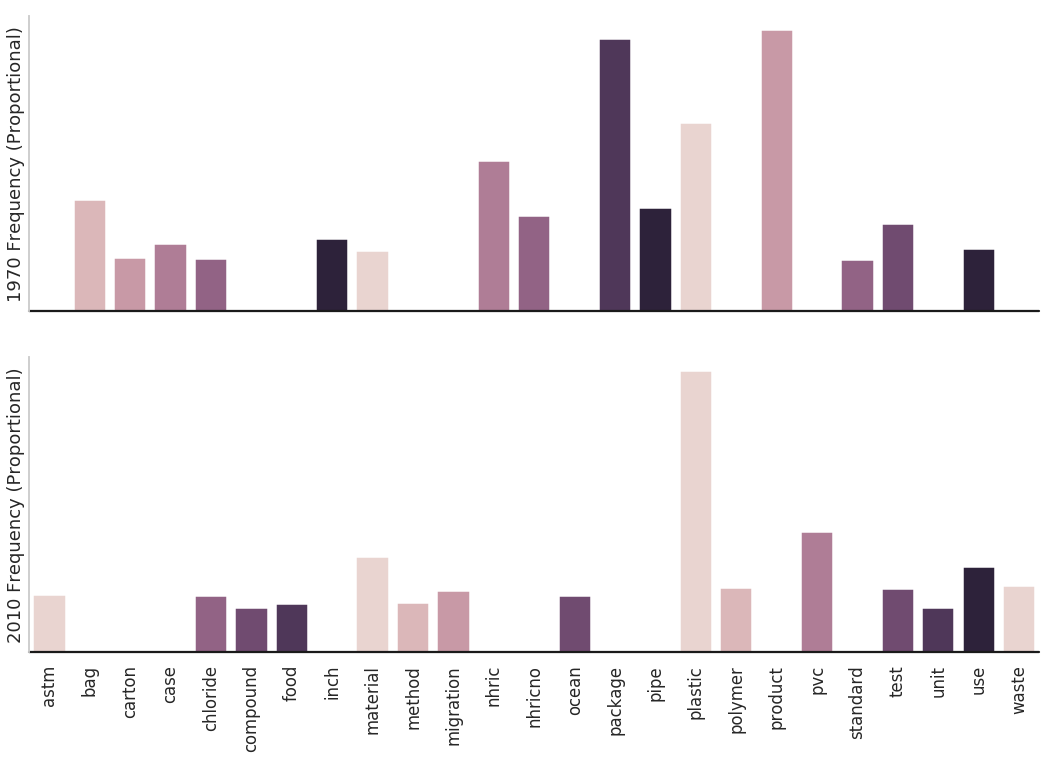

In [9]:
# Visualizing the Information for Comparison
import seaborn as sns

sns.set(style="whitegrid", context="talk");

# matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True);

# 1970
x = df ["Recurring Keywords"]
y1 = df ["T1970"]
sns.barplot(x=x, y=y1, palette=sns.cubehelix_palette(8), ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_xlabel("")
ax1.set_ylabel("1970 Frequency (Proportional)")

# 2010
y2 = df ["T2010"]
sns.barplot(x=x, y=y2, palette=sns.cubehelix_palette(8), ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_xlabel("")
ax2.set_ylabel("2010 Frequency (Proportional)")

# Finalize the plot
sns.despine(bottom=True);
plt.setp(f.axes, yticks=[]);
plt.tight_layout(h_pad=1);
plt.xticks(rotation=90);



In [0]:
%matplotlib inline

In [0]:
# Create New Visualization
